# Email-nikhilshetty0207@gmail.com
#Phone number - 60953228805

In [1]:
#Importing all the needed python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys

In [6]:
#Loading the file into a DataFrame

data =pd.read_csv("screening_exercise_orders_v201810.csv")
data.head(20)
#data.columns

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


In [3]:
#Next few steps I performed Exploratory Data Analysis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null object
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [4]:
data.describe()

,customer_id,gender,value,predicted_gender
count,13471.000000,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179,0.642788
std,2500.179222,0.500016,387.210821,0.479196
min,1000.000000,0.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000,0.000000
50%,4850.000000,0.000000,258.000000,1.000000
75%,7157.000000,1.000000,426.000000,1.000000
max,9813.000000,1.000000,8046.300000,1.000000


In [12]:
#Satified the Part A) of the requirement

data["most_recent_order_date"]=pd.to_datetime(data["date"])
#print(data["most_recent_order_date"])

grouped_df_date=data.sort_values("most_recent_order_date",ascending=False).groupby("customer_id")["date"].apply(list).reset_index()
#grouped_df_date=grouped_df_date.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],axis=1)
#grouped_df_date.columns=["customer_id","most_recent_order_date"]
print(grouped_df_date)
grouped_df_gender=data.sort_values("most_recent_order_date",ascending=False).groupby("customer_id")["gender"].apply(list).apply(pd.Series).reset_index()
grouped_df_gender=grouped_df_gender.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],axis=1)
grouped_df_gender.columns=["customer_id","gender"]
#print(grouped_df_gender)
grouped_df_count=data.sort_values("most_recent_order_date",ascending=False).groupby("customer_id").count()
grouped_df_count=grouped_df_count.drop(["date","value","predicted_gender","most_recent_order_date"],axis=1)
grouped_df_count.columns=["order_count"]
type(grouped_df_count)
#print(grouped_df_count)

new_dataset=pd.merge(grouped_df_date,grouped_df_gender,on="customer_id")
new_dataset2=pd.merge(new_dataset,grouped_df_count, on="customer_id")
#new_dataset2.head(10)

      customer_id                                               date
0            1000                              [2017-01-01 00:11:31]
1            1001                              [2017-01-01 00:29:56]
2            1002  [2017-02-19 21:35:31, 2017-01-23 04:33:38, 201...
3            1003  [2017-04-26 02:37:20, 2017-04-25 09:54:54, 201...
4            1004                              [2017-01-01 03:11:54]
5            1005         [2017-12-16 01:39:27, 2017-01-01 10:08:05]
6            1006  [2017-05-09 15:27:20, 2017-03-09 00:31:51, 201...
7            1007                              [2017-01-01 15:59:50]
8            1008  [2017-12-17 05:47:48, 2017-01-03 19:23:39, 201...
9            1009                              [2017-01-01 19:27:17]
10           1010         [2017-04-28 13:31:11, 2017-01-01 19:41:40]
11           1011                              [2017-01-01 22:04:54]
12           1012                              [2017-01-01 22:08:16]
13           1013                 

<function matplotlib.pyplot.show(*args, **kw)>

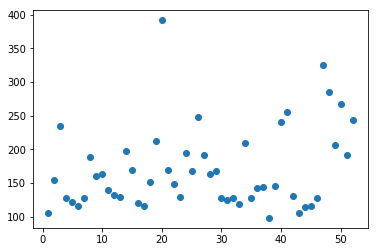

In [118]:
#Satified the Part B) of the requirement

df1=new_dataset2.loc[:,"order_count"].reset_index()
df1["Week_num"]=pd.to_datetime(new_dataset2["most_recent_order_date"]).dt.week
df2=df1.groupby("Week_num").count()
df2=df2.drop("index",axis=1).reset_index()


plt.scatter(x=df2["Week_num"], y=df2["order_count"])
plt.show

In [119]:
#Satified the Part C) of the requirement
#Ans: The mean expenditure of the Female gender is higher than that of the Male Gender but there is no significant change.I performed this on the original dataset and not the Part A) Dataframe which I created as the original set consist of the amount attribute and have conisdered the mean for all the customers who bought something from the store and not the uniuque customers

data[data["gender"]==0]["value"].mean()

363.89000591803506

In [120]:
data[data["gender"]==1]["value"].mean()

350.70836114422

In [121]:
X=data.drop(["predicted_gender","most_recent_order_date","date","gender"],axis=1)
Y=data["gender"]
print(X.head())
print(Y.head())

   customer_id  value
0         1000  198.5
1         1001  338.0
2         1002  733.0
3         1003  772.0
4         1004  508.0
0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64


In [122]:
#Satified the Part D) of the requirement on the original dataset,where I created my own Predictive model of an Ensemble method along with K Cross Validation to Predict the Gender and also created an Confusion Matrix which tells us about the Type 1 error (i.e the False Negative) and Type 2 error (i.e the False Positive) which are 575 and 658 for this scenario 

from sklearn.model_selection import train_test_split
from sklearn import svm

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1375
           1       0.54      0.53      0.53      1320

   micro avg       0.54      0.54      0.54      2695
   macro avg       0.54      0.54      0.54      2695
weighted avg       0.54      0.54      0.54      2695



In [125]:
cm=confusion_matrix(y_test,predictions)
print(cm)

[[773 602]
 [627 693]]


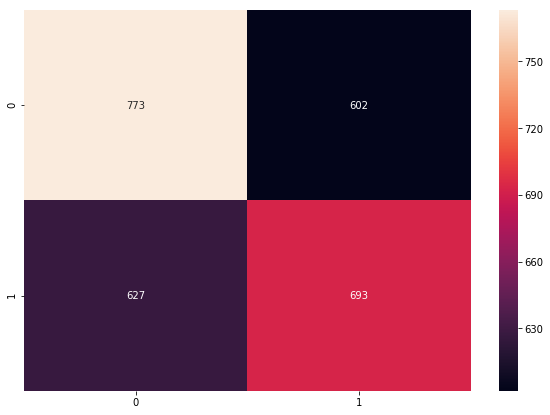

In [126]:
#Visual representation of the confusion matrix

df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True,fmt='g')

In [127]:
#Performed K-Cross Validation for the same inputs

from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=10)
print(accuracies.mean())

0.5342500442359489


In [128]:
#Created a DataFrame of the Predicted and Actual Gender for better visualization and understanding

final_results=pd.DataFrame(columns=["Actual_gender","Predicted_gender"])
final_results["Actual_gender"]=y_test
final_results["Predicted_gender"]=predictions
final_results.columns
final_results.head(20).reset_index()

,index,Actual_gender,Predicted_gender
0,5745,0,0
1,1443,1,0
2,4023,1,0
3,8826,1,1
4,5053,1,0
5,7750,1,1
6,2179,0,1
7,2349,0,0
8,9368,0,0
9,7376,1,1


In [112]:
#Satified the Part E) of the requirement

#ANS:

#Python and Jupyter notebook or any of the IDEs as it gives me the platform to work on machine learning related issues and also it has Pandas library that provides easy to use data structures and high-performance data analysis tools along with other packages.
#The fact that I can take real time data and work and predict important events from it is itself an exciting thought for me and to be able do that gives me even more satisfaction, it’s basically having the power to predict the future with the events from the past.
#Along with Jupyter notebook, Tableau and Cloud (AWS) are my 2 other favorite tools that I like to play around and learn more about it
#A very important application of ML was when I could work on a Dataset which had asked me to classify Cancer as "Malign" and "Benignant”. Having somebody very close to me, I have had experience of a mistake made by the doctor on the type of cancer diagnosed. And when I was able to build my own model based on the previous histories of patients, it personally gave me great satisfaction and motivation. 